In [621]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
%matplotlib inline

In [417]:
import os
curr_directory = os.getcwd()
datafile = curr_directory + "/all_recipe_data.json"

In [418]:
import json
raw_recipe_data = pd.read_json(datafile)

In [419]:
raw_recipe_data.isnull().values.any()

False

In [420]:
raw_recipe_data = raw_recipe_data.replace(np.nan, "", regex=True)
raw_recipe_data.head()

,Author,Instructions
0,[witchywoman],"Mix grapefruit, orange, apples, pineapple, mar..."
1,[witchywoman],Fill a margarita glass with crushed ice. Pour ...
2,[witchywoman],Preheat an oven to 350 degrees F (175 degrees ...
3,[witchywoman],
4,[witchywoman],"Mix the teriyaki sauce, garlic, ginger, and re..."


In [421]:
raw_recipe_data.isnull().sum()

Author          0
Instructions    0
dtype: int64

In [422]:
raw_recipe_data.head()

,Author,Instructions
0,[witchywoman],"Mix grapefruit, orange, apples, pineapple, mar..."
1,[witchywoman],Fill a margarita glass with crushed ice. Pour ...
2,[witchywoman],Preheat an oven to 350 degrees F (175 degrees ...
3,[witchywoman],
4,[witchywoman],"Mix the teriyaki sauce, garlic, ginger, and re..."


In [423]:
raw_recipe_data.Author = raw_recipe_data.Author.apply(lambda x: x[0])

raw_recipe_data.Author.value_counts()

exception                    118
LoveMexiFood                  13
TheBritishBaker               13
Johanna WISHES she were a     11
witchywoman                   11
bellepepper                   10
Peach822                      10
ellie                         10
Semigourmet                   10
Litegal1                      10
Chef John                     10
Name: Author, dtype: int64

In [424]:
raw_recipe_data.drop(3, axis=0, inplace=True)
raw_recipe_data = raw_recipe_data[raw_recipe_data.Author != "exception"]


In [425]:
from string import punctuation

transtab = str.maketrans({key:None for key in punctuation if key != "."})

In [426]:
# remove punctuation
raw_recipe_data.Instructions = raw_recipe_data.Instructions.apply(lambda x: x.lower().translate(transtab).strip().split("."))
raw_recipe_data.head()

,Author,Instructions
0,witchywoman,[mix grapefruit orange apples pineapple marasc...
1,witchywoman,"[fill a margarita glass with crushed ice, pou..."
2,witchywoman,[preheat an oven to 350 degrees f 175 degrees ...
4,witchywoman,[mix the teriyaki sauce garlic ginger and red ...
5,witchywoman,[fill a pint glass with ice and pour in the vo...


In [427]:
raw_recipe_data.Instructions.iloc[0]

['mix grapefruit orange apples pineapple maraschino cherries and grapes in a large bowl',
 ' mash slightly with the back of a wooden spoon to release juices',
 ' add bananas coconut walnuts and sugar stir to coat',
 ' cover and refrigerate to blend flavors at least 1 hour',
 '']

In [428]:
raw_recipe_data.loc[:,"FullInstruction"] = raw_recipe_data.Instructions.apply(lambda x: "".join(x))


In [429]:
# Get Instructions: List of list of sentences; DONE
# Flatten list of list of sentences -> List of sentences; DONE
# Remove stopwords from each sentence; DONE
# Create Train/Test split of sentences; DONE
# Pass Training set into Gensim; DONE

In [430]:
# get instructions
sentences = [text for text in raw_recipe_data.FullInstruction]
sentences[:3]

['mix grapefruit orange apples pineapple maraschino cherries and grapes in a large bowl mash slightly with the back of a wooden spoon to release juices add bananas coconut walnuts and sugar stir to coat cover and refrigerate to blend flavors at least 1 hour',
 'fill a margarita glass with crushed ice pour tequila melon liqueur and triple sec into the glass top with sour mix grenadine lime juice and orange juice garnish with the cherry and a wedge of orange',
 'preheat an oven to 350 degrees f 175 degrees c grease 12 muffin cups or line with paper muffin liners stir the flour cinnamon nutmeg allspice cloves pumpkin pie spice cardamom ginger salt and baking soda together in a bowl beat the brown sugar and the eggs together with an electric mixer in a large bowl until smooth add 12 cup plus 2 tablespoons vegetable oil and pumpkin continue beating until integrated pour the flour mixture into the egg mixture and beat until just incorporated fill the prepared muffin cups about halffull with 

In [431]:
# flatten list of sentences
from itertools import chain

#sentences = list(chain.from_iterable(sentences))

In [752]:
sentences;

In [433]:
# remove empty strings
clean_sentences = list(filter(None, sentences))


In [632]:
len(sentences)

107

In [696]:
# remove stop words
stoplist = set('a an and are as at be by for from has he in is it its of on or that the to was will with'.split(' '))
sentences_text = [[word for word in document.split() if word not in stoplist]
                  for document in sentences]

In [436]:
# flatten list of words of sentences
#combined_text = list(chain.from_iterable(sentences_text))
raw_recipe_data.dtypes

Author             object
Instructions       object
FullInstruction    object
dtype: object

In [437]:
raw_recipe_data['Author'] = raw_recipe_data['Author'].astype('category')
raw_recipe_data.dtypes

Author             category
Instructions         object
FullInstruction      object
dtype: object

In [438]:
raw_recipe_data['Author_codes'] = raw_recipe_data['Author'].cat.codes
raw_recipe_data.head()

,Author,Instructions,FullInstruction,Author_codes
0,witchywoman,[mix grapefruit orange apples pineapple marasc...,mix grapefruit orange apples pineapple marasch...,9
1,witchywoman,"[fill a margarita glass with crushed ice, pou...",fill a margarita glass with crushed ice pour t...,9
2,witchywoman,[preheat an oven to 350 degrees f 175 degrees ...,preheat an oven to 350 degrees f 175 degrees c...,9
4,witchywoman,[mix the teriyaki sauce garlic ginger and red ...,mix the teriyaki sauce garlic ginger and red p...,9
5,witchywoman,[fill a pint glass with ice and pour in the vo...,fill a pint glass with ice and pour in the vod...,9


In [439]:
raw_recipe_data['Author_codes'].value_counts()

6    13
3    13
1    11
9    10
8    10
7    10
5    10
4    10
2    10
0    10
Name: Author_codes, dtype: int64

In [633]:
np.random.shuffle(sentences_text)
train, test = sentences_text[:81], sentences_text[81:]

In [634]:
len(sentences_text)

107

In [444]:
# import modules & set up logging
import gensim, logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [650]:
model = gensim.models.Word2Vec(train, min_count=3, sg=1, window=5, sample=1e-3)

2018-05-02 13:59:29,856 : INFO : collecting all words and their counts
2018-05-02 13:59:29,861 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-05-02 13:59:29,876 : INFO : collected 1021 word types from a corpus of 4763 raw words and 81 sentences
2018-05-02 13:59:29,878 : INFO : Loading a fresh vocabulary
2018-05-02 13:59:29,887 : INFO : min_count=3 retains 398 unique words (38% of original 1021, drops 623)
2018-05-02 13:59:29,889 : INFO : min_count=3 leaves 3979 word corpus (83% of original 4763, drops 784)
2018-05-02 13:59:29,895 : INFO : deleting the raw counts dictionary of 1021 items
2018-05-02 13:59:29,897 : INFO : sample=0.001 downsamples 104 most-common words
2018-05-02 13:59:29,898 : INFO : downsampling leaves estimated 2884 word corpus (72.5% of prior 3979)
2018-05-02 13:59:29,902 : INFO : estimated required memory for 398 words and 100 dimensions: 517400 bytes
2018-05-02 13:59:29,904 : INFO : resetting layer weights
2018-05-02 13:59:29,923 : IN

In [446]:
X = model[model.wv.vocab]

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [622]:
word_vectors = model.wv

In [743]:
cake = word_vectors['cake']
chicken = word_vectors['chicken']
cake2 = cake + chicken

In [746]:
cake2

array([ 0.22424424,  0.11131816,  0.03085391,  0.47243512, -0.54844296,
       -0.3838492 ,  0.41299847,  0.26537633, -0.27238196, -0.06404384,
        0.37003332,  0.1950729 ,  0.38271666,  0.04580215, -0.2339418 ,
       -0.05775235,  0.3011028 ,  0.11330891,  0.07576211, -0.2696826 ,
       -0.15669075,  0.12069277,  0.17864564, -0.11760241, -0.44103238,
       -0.09306122,  0.21927801,  0.3796661 ,  0.35327125, -0.07845819,
       -0.31220177,  0.6290693 , -0.08785152, -0.26700175, -0.32449985,
       -0.11767347, -0.26819766,  0.40515232, -0.11933589, -0.01712491,
       -0.15232074,  0.07633139, -0.19906166, -0.21301284, -0.01248195,
       -0.26218408,  0.00805728, -0.02701759,  0.15853254,  0.22331093,
        0.55837953,  0.05492173,  0.36237347, -0.0210443 , -0.18464597,
        0.24723324,  0.29347497,  0.22454822, -0.3570693 , -0.03777549,
        0.04656187,  0.3845311 ,  0.02012612, -0.07460923,  0.08868694,
        0.10252264, -0.32996544,  0.08942568,  0.11230709, -0.02

In [738]:

#def sentence_vector(model_vectors):
    #function to sum all words vectors in a given sentence
#    featureVec = np.zeros((100,), dtype="float32")
#    try:
#        for word in words:
#            featureVec = np.add(featureVec, model_vectors[word])
#    except:
#        pass
#    return featureVec

#[[word for word in document.split() if word not in stoplist] for document in sentences]
#featureVec = np.zeros((100,), dtype="float32")
for each in raw_recipes_data.FullInstruction.str.split():
    featureVec = np.zeros((100,), dtype="float32")
    featureVec = np.add(featureVec, model_vectors[each])
    return featureVec

SyntaxError: 'return' outside function (<ipython-input-738-df5f6d51e8a0>, line 17)

In [750]:
def avg_sentence_vector(words, model, num_features, index2word_set):
    #function to average all words vectors in a given paragraph
    featureVec = np.zeros((num_features,), dtype="float32")
    nwords = 0

    for word in words:
        if word not in index2word_set:
            nwords = nwords+1
            featureVec = np.add(featureVec, model[word])

    if nwords>0:
        pass
    return featureVec


In [751]:
raw_recipe_data['Instruction_Vectors'] = avg_sentence_vector(raw_recipe_data.FullInstruction.str.split(), model=word_vectors, num_features=100, index2word_set=stoplist)


TypeError: unhashable type: 'list'

In [681]:
len(model.wv.vocab)

398

In [448]:
model.wv.similarity('boil','bake')

0.9991147332680362

In [449]:
model.wv.similar_by_word('cake')

2018-04-30 21:18:37,521 : INFO : precomputing L2-norms of word weight vectors


[('hours', 0.999478816986084),
 ('each', 0.9994742274284363),
 ('top', 0.9994727373123169),
 ('well', 0.9994696378707886),
 ('4', 0.9994668960571289),
 ('have', 0.9994606971740723),
 ('drain', 0.9994592070579529),
 ('lightly', 0.9994571208953857),
 ('using', 0.9994498491287231),
 ('thoroughly', 0.9994454383850098)]

# Dimentionality Reduction

In [450]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)

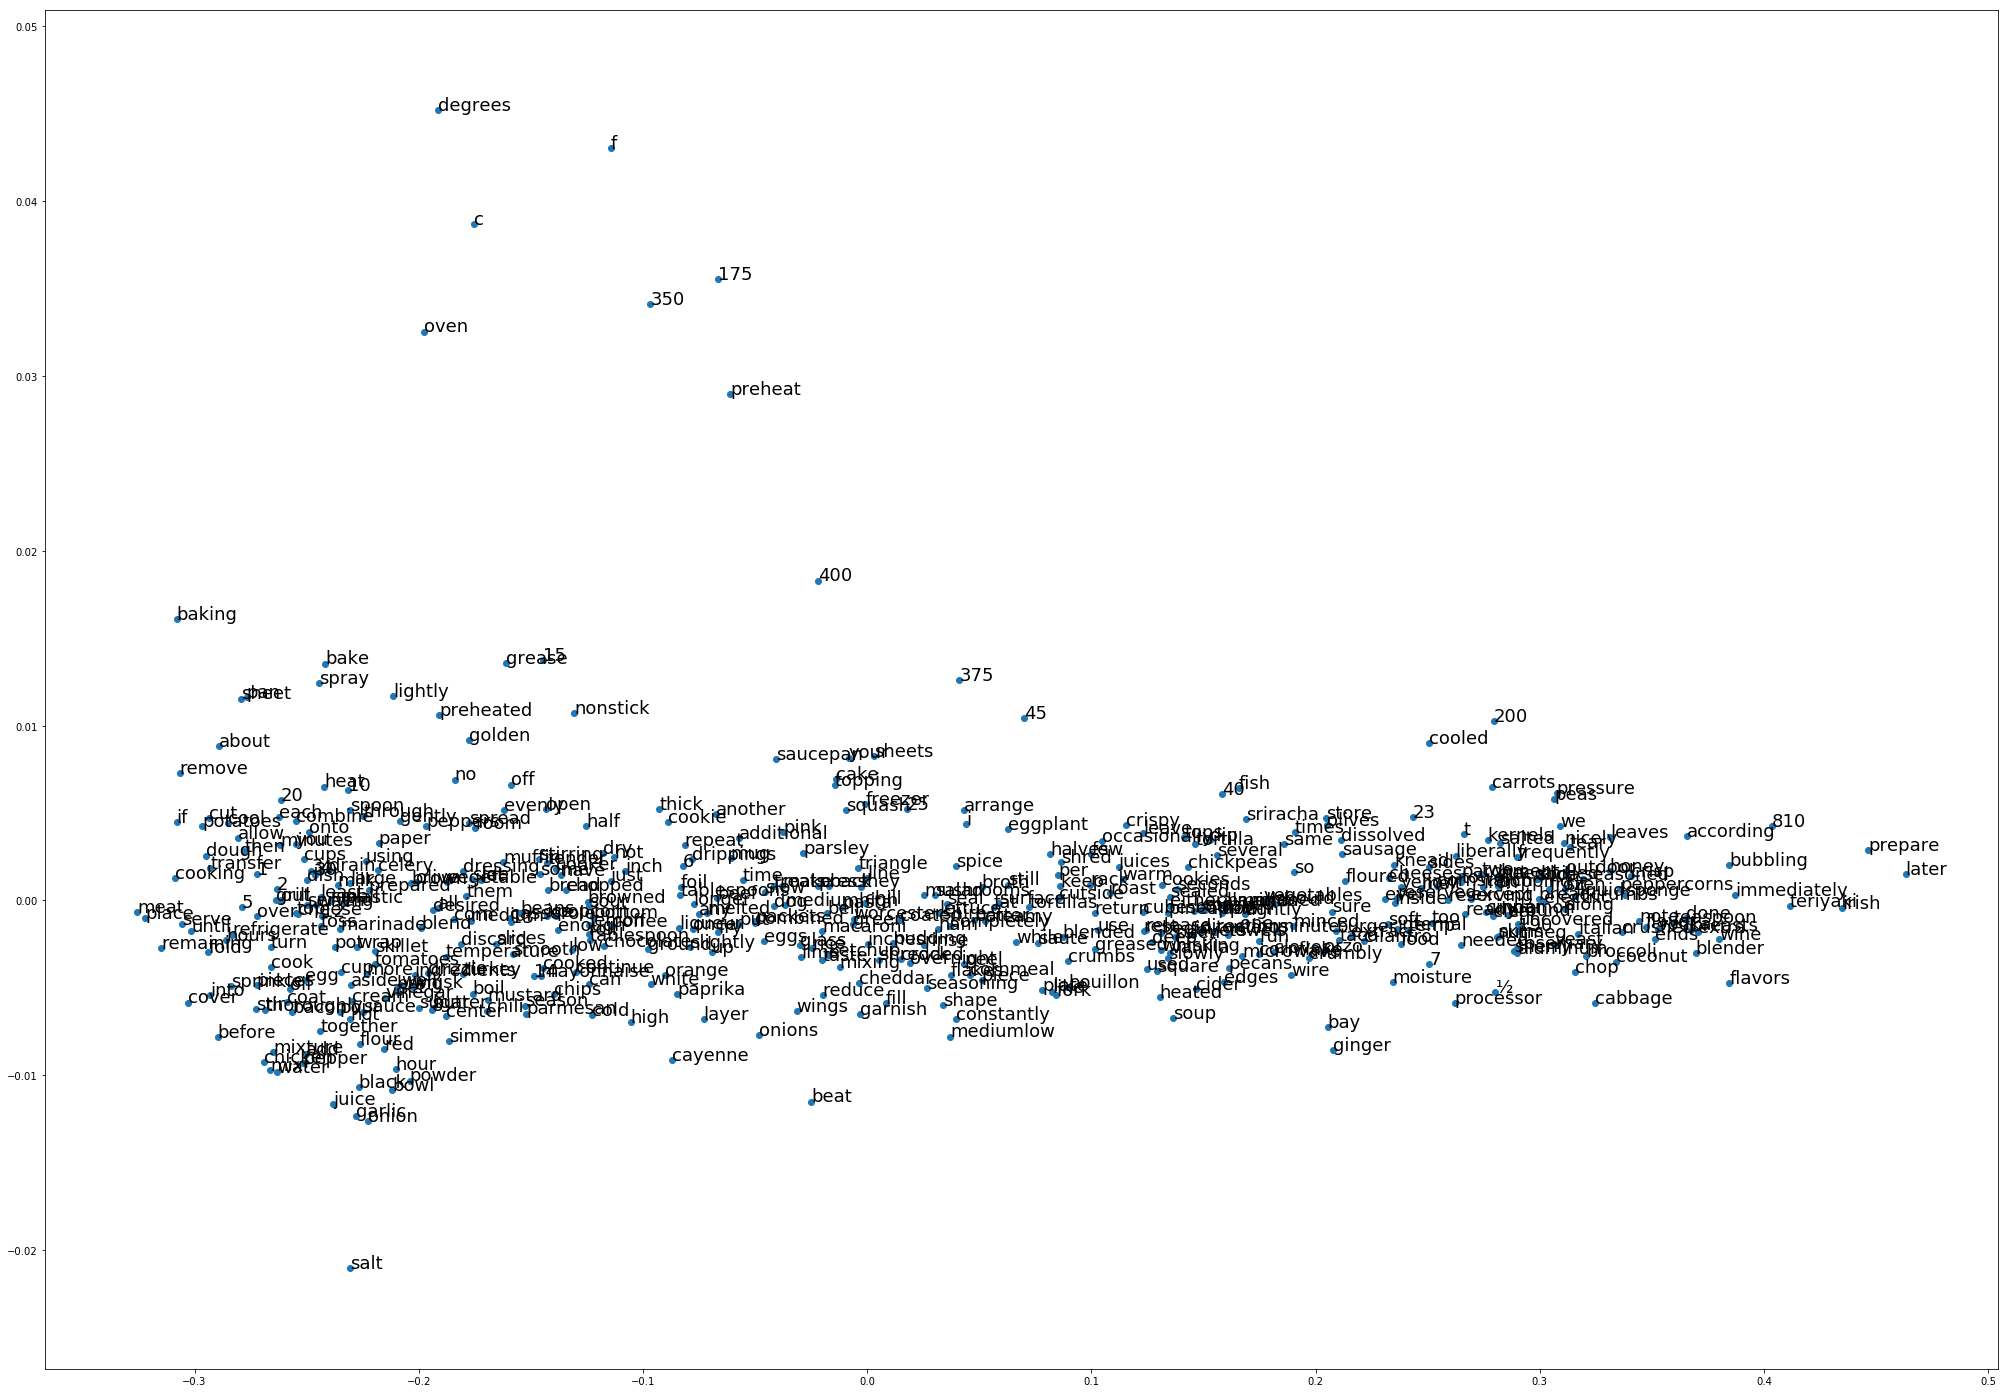

In [451]:
# PLOT PCA ONLY
plt.figure(figsize=((35,25)))
plt.scatter(pca_data[:, 0], pca_data[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(pca_data[i, 0], pca_data[i, 1]), fontsize=18)


In [452]:
from sklearn import manifold

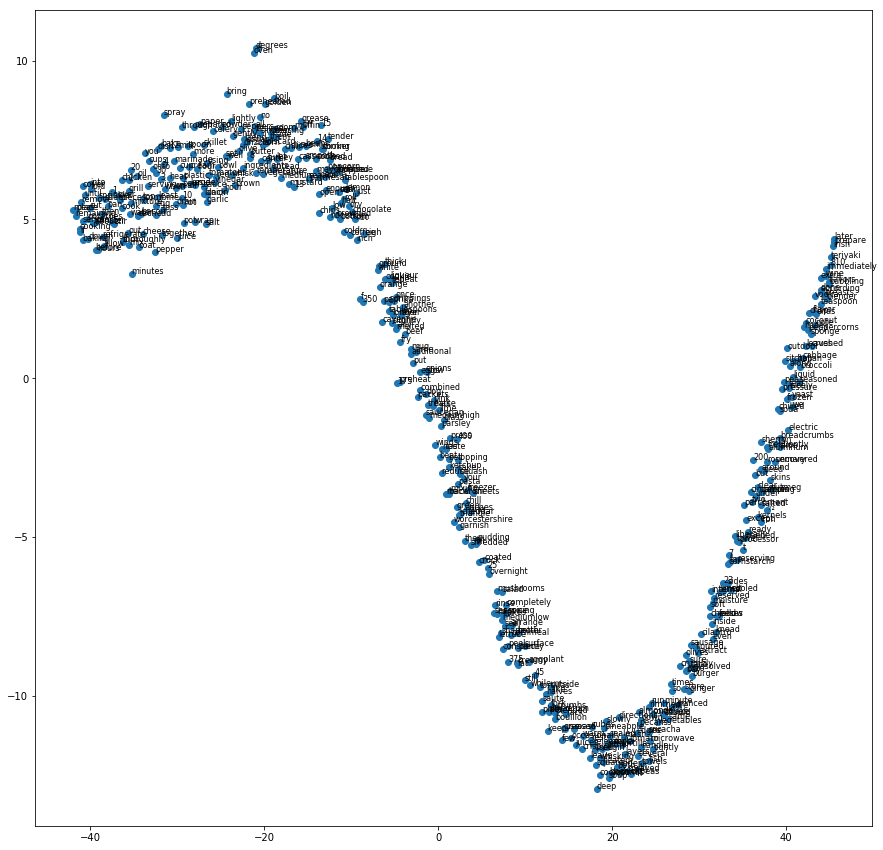

In [453]:
# PLOT TSNE ONLY
tsne = manifold.TSNE(n_components=2, init='pca', perplexity=30, random_state=0)
tsne_data = tsne.fit_transform(X)
plt.figure(figsize=((15,15)))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(tsne_data[i, 0], tsne_data[i, 1]), fontsize=8)


/anaconda/lib/python3.6/site-packages/sklearn/manifold/mds.py:411: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


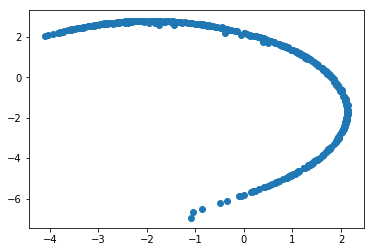

In [454]:
# PLOT MDS ONLY
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import DistanceMetric
dist = DistanceMetric.get_metric('euclidean')

mds = manifold.MDS(2, max_iter=200, n_init=1)
distances = dist.pairwise(X)
mds_data = mds.fit_transform(distances)
plt.scatter(mds_data[:, 0], mds_data[:, 1])

In [455]:
# PLOT TSVD ONLY
from sklearn.decomposition import TruncatedSVD
t_svd = TruncatedSVD(n_components=2)

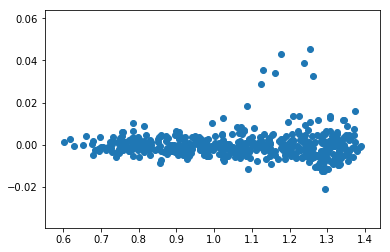

In [456]:
t_svd_data = t_svd.fit_transform(X)
plt.scatter(t_svd_data[:, 0], t_svd_data[:, 1])

# Clustering

In [603]:
# set up clustering estimators
from sklearn import cluster

dbscan = cluster.DBSCAN(metric='cityblock', algorithm='auto', min_samples=3, eps=.2) 
meanshift = cluster.MeanShift()
spectral = cluster.SpectralClustering()
affinity = cluster.AffinityPropagation(damping=.6, preference=.5)

In [ ]:
y = raw_recipe_data['Author_Code']

## DBSCAN on MDS data

In [592]:
# dbscan with MDS data
mds_dbscan = dbscan.fit(mds_data)


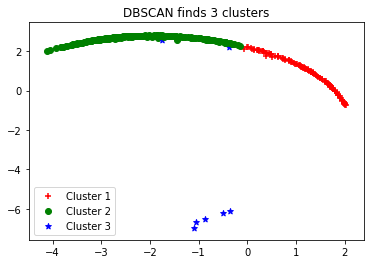

In [593]:
for i in range(0, mds_data.shape[0]):
    if mds_dbscan.labels_[i] == 0:
        c1 = plt.scatter(mds_data[i,0], mds_data[i,1], c='r', marker='+')
    elif mds_dbscan.labels_[i] == 1:
        c2 = plt.scatter(mds_data[i,0], mds_data[i,1], c='g', marker='o')
    elif mds_dbscan.labels_[i] == -1:
        c3 = plt.scatter(mds_data[i,0], mds_data[i,1], c='b', marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3'])

plt.title('DBSCAN finds 3 clusters')
plt.show()

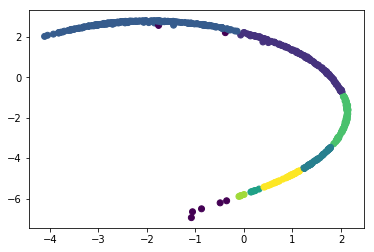

In [594]:
plt.scatter(mds_data[:, 0], mds_data[:,1], c = mds_dbscan.labels_)


## DBSCAN on TSNE data

In [595]:
# lets see dbscan clusters for tsne
tsne_dbscan = dbscan.fit(tsne_data)

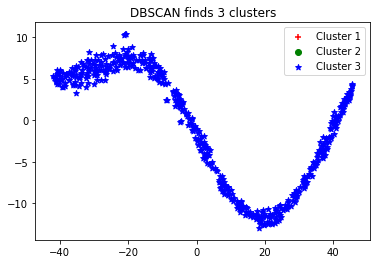

In [596]:
for i in range(0, tsne_data.shape[0]):
    if tsne_dbscan.labels_[i] == 0:
        c1 = plt.scatter(tsne_data[i,0], tsne_data[i,1], c='r', marker='+')
    elif tsne_dbscan.labels_[i] == 1:
        c2 = plt.scatter(tsne_data[i,0], tsne_data[i,1], c='g', marker='o')
    elif tsne_dbscan.labels_[i] == -1:
        c3 = plt.scatter(tsne_data[i,0], tsne_data[i,1], c='b', marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('DBSCAN finds 3 clusters')
plt.show()

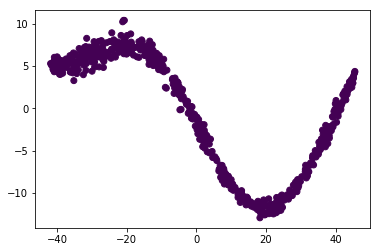

In [597]:
plt.scatter(tsne_data[:, 0], tsne_data[:,1], c = tsne_dbscan.labels_)


## DBSCAN on PCA data

In [598]:
# dbscan with PCA data
pca_dbscan = dbscan.fit(pca_data)


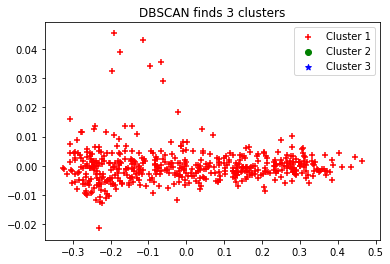

In [599]:
for i in range(0, pca_data.shape[0]):
    if pca_dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_data[i,0], pca_data[i,1], c='r', marker='+')
    elif pca_dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_data[i,0], pca_data[i,1], c='g', marker='o')
    elif pca_dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_data[i,0], pca_data[i,1], c='b', marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('DBSCAN finds 3 clusters')
plt.show()

## DBSCAN on TruncatedSVD

In [600]:
tsvd_dbscan = dbscan.fit(t_svd_data)

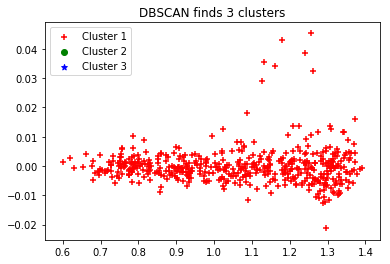

In [601]:
for i in range(0, t_svd_data.shape[0]):
    if tsvd_dbscan.labels_[i] == 0:
        c1 = plt.scatter(t_svd_data[i,0], t_svd_data[i,1], c='r', marker='+')
    elif tsvd_dbscan.labels_[i] == 1:
        c2 = plt.scatter(t_svd_data[i,0], t_svd_data[i,1], c='g', marker='o')
    elif tsvd_dbscan.labels_[i] == -1:
        c3 = plt.scatter(t_svd_data[i,0], t_svd_data[i,1], c='b', marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('DBSCAN finds 3 clusters')
plt.show()

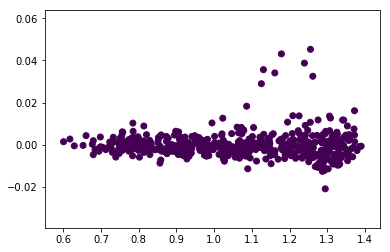

In [602]:
plt.scatter(t_svd_data[:, 0], t_svd_data[:,1], c = tsvd_dbscan.labels_)


In [470]:
from sklearn.model_selection import GridSearchCV

def check_grid(estimator, params, X, y):
    grid_classifier = GridSearchCV(estimator=estimator, param_grid=params)
    grid_classifier.fit(X, y)
    grid_score = grid_classifier.score(X, y)
    return (grid_classifier, grid_score)


## MeanShift on PCA data

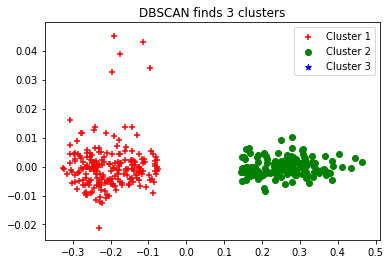

In [471]:
# Meanshift on PCA data
meanshift_pca = meanshift.fit(pca_data)
for i in range(0, pca_data.shape[0]):
    if meanshift_pca.labels_[i] == 0:
        c1 = plt.scatter(pca_data[i,0], pca_data[i,1], c='r', marker='+')
    elif meanshift_pca.labels_[i] == 1:
        c2 = plt.scatter(pca_data[i,0], pca_data[i,1], c='g', marker='o')
    elif meanshift_pca.labels_[i] == -1:
        c3 = plt.scatter(pca_data[i,0], pca_data[i,1], c='b', marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('DBSCAN finds 3 clusters')
plt.show()

## MeanShift on MDS data

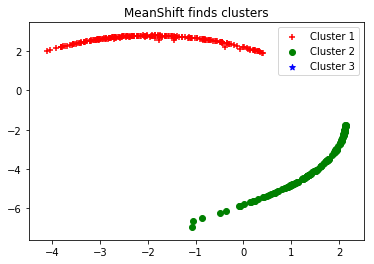

In [472]:
meanshift_mds = meanshift.fit(mds_data)
for i in range(0, mds_data.shape[0]):
    if meanshift_mds.labels_[i] == 0:
        c1 = plt.scatter(mds_data[i,0], mds_data[i,1], c='r', marker='+')
    elif meanshift_mds.labels_[i] == 1:
        c2 = plt.scatter(mds_data[i,0], mds_data[i,1], c='g', marker='o')
    elif meanshift_mds.labels_[i] == -1:
        c3 = plt.scatter(mds_data[i,0], mds_data[i,1], c='b', marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('MeanShift finds clusters')
plt.show()

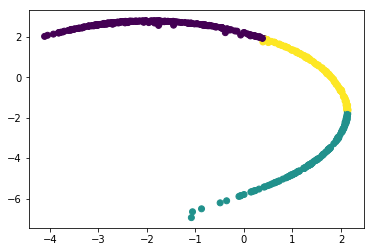

In [473]:
plt.scatter(mds_data[:, 0], mds_data[:,1], c = meanshift_mds.labels_)
# try another plot method

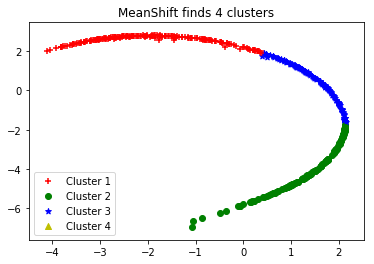

In [474]:
# meanshift mds
for i in range(0, mds_data.shape[0]):
    if meanshift_mds.labels_[i] == 0:
        c1 = plt.scatter(mds_data[i,0], mds_data[i,1], c='r', marker='+')
    elif meanshift_mds.labels_[i] == 1:
        c2 = plt.scatter(mds_data[i,0], mds_data[i,1], c='g', marker='o')
    elif meanshift_mds.labels_[i] == 2:
        c3 = plt.scatter(mds_data[i,0], mds_data[i,1], c='b', marker='*')
    elif meanshift_mds.labels_[i] == 3:
        c4 = plt.scatter(mds_data[i,0], mds_data[i,1], c='y', marker='^')

plt.legend([c1, c2, c3, c4], ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
plt.title('MeanShift finds 4 clusters')
plt.show()

## MeanShift on TSNE data

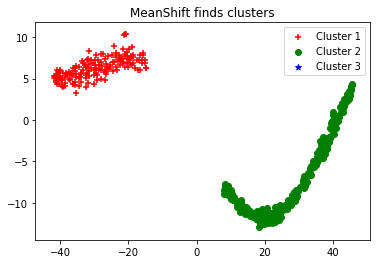

In [475]:
meanshift_tsne = meanshift.fit(tsne_data)
for i in range(0, pca_data.shape[0]):
    if meanshift_tsne.labels_[i] == 0:
        c1 = plt.scatter(tsne_data[i,0], tsne_data[i,1], c='r', marker='+')
    elif meanshift_tsne.labels_[i] == 1:
        c2 = plt.scatter(tsne_data[i,0], tsne_data[i,1], c='g', marker='o')
    elif meanshift_tsne.labels_[i] == -1:
        c3 = plt.scatter(tsne_data[i,0], tsne_data[i,1], c='b', marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('MeanShift finds clusters')
plt.show()

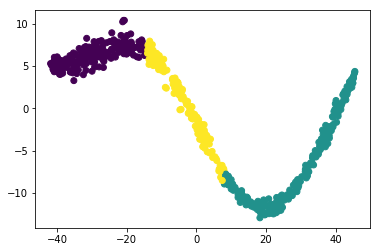

In [476]:
plt.scatter(tsne_data[:, 0], tsne_data[:,1], c = meanshift_tsne.labels_)
# compare two ways to plot

## MeanShift on PCA data

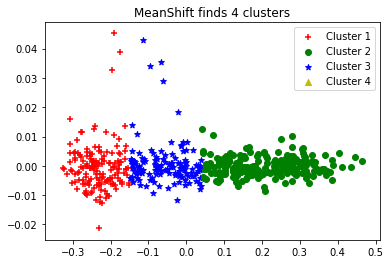

In [478]:
# meanshift pca
for i in range(0, pca_data.shape[0]):
    if meanshift_pca.labels_[i] == 0:
        c1 = plt.scatter(pca_data[i,0], pca_data[i,1], c='r', marker='+')
    elif meanshift_pca.labels_[i] == 1:
        c2 = plt.scatter(pca_data[i,0], pca_data[i,1], c='g', marker='o')
    elif meanshift_pca.labels_[i] == 2:
        c3 = plt.scatter(pca_data[i,0], pca_data[i,1], c='b', marker='*')
    elif meanshift_pca.labels_[i] == 3:
        c4 = plt.scatter(pca_data[i,0], pca_data[i,1], c='y', marker='^')

plt.legend([c1, c2, c3, c4], ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
plt.title('MeanShift finds 4 clusters')
plt.show()

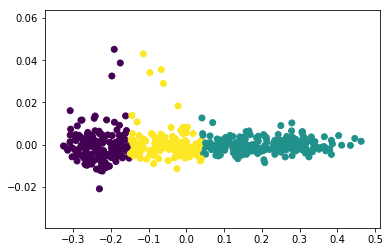

In [479]:
plt.scatter(pca_data[:, 0], pca_data[:,1], c = meanshift_pca.labels_)


## MeanShift on TSVD

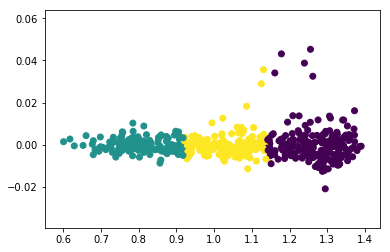

In [480]:
tsvd_meanshift = meanshift.fit(t_svd_data)
plt.scatter(t_svd_data[:, 0], t_svd_data[:,1], c = tsvd_meanshift.labels_)

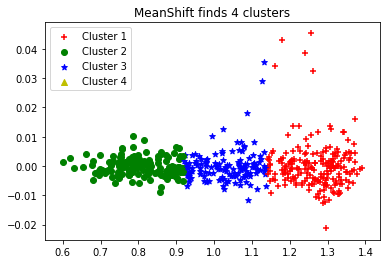

In [481]:
for i in range(0, t_svd_data.shape[0]):
    if tsvd_meanshift.labels_[i] == 0:
        c1 = plt.scatter(t_svd_data[i,0], t_svd_data[i,1], c='r', marker='+')
    elif tsvd_meanshift.labels_[i] == 1:
        c2 = plt.scatter(t_svd_data[i,0], t_svd_data[i,1], c='g', marker='o')
    elif tsvd_meanshift.labels_[i] == 2:
        c3 = plt.scatter(t_svd_data[i,0], t_svd_data[i,1], c='b', marker='*')
    elif tsvd_meanshift.labels_[i] == 3:
        c4 = plt.scatter(t_svd_data[i,0], t_svd_data[i,1], c='y', marker='^')

plt.legend([c1, c2, c3, c4], ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
plt.title('MeanShift finds 4 clusters')
plt.show()

## Spectral Clustering 

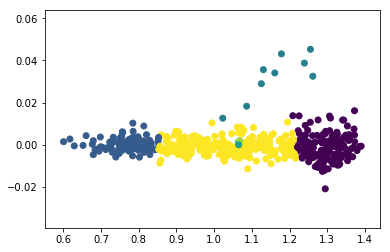

In [482]:
# truncated svd
tsvd_spectral = spectral.fit(t_svd_data)
plt.scatter(t_svd_data[:, 0], t_svd_data[:,1], c = tsvd_spectral.labels_)

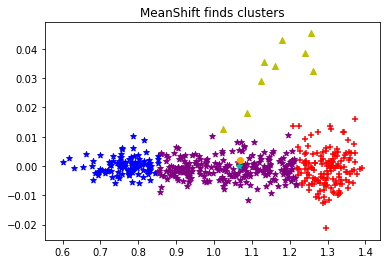

In [483]:
# truncated svd
for i in range(0, t_svd_data.shape[0]):
    if tsvd_spectral.labels_[i] == 0:
        c1 = plt.scatter(t_svd_data[i,0], t_svd_data[i,1], c='r', marker='+')
    elif tsvd_spectral.labels_[i] == 1:
        c2 = plt.scatter(t_svd_data[i,0], t_svd_data[i,1], c='g', marker='o')
    elif tsvd_spectral.labels_[i] == 2:
        c3 = plt.scatter(t_svd_data[i,0], t_svd_data[i,1], c='b', marker='*')
    elif tsvd_spectral.labels_[i] == 3:
        c4 = plt.scatter(t_svd_data[i,0], t_svd_data[i,1], c='y', marker='^')
    elif tsvd_spectral.labels_[i] == 4:
        c5 = plt.scatter(t_svd_data[i,0], t_svd_data[i,1], c='c', marker='*')
    elif tsvd_spectral.labels_[i] == 5:
        c6 = plt.scatter(t_svd_data[i,0], t_svd_data[i,1], c='m', marker='+')
    elif tsvd_spectral.labels_[i] == 6:
        c7 = plt.scatter(t_svd_data[i,0], t_svd_data[i,1], c='orange', marker='o')
    elif tsvd_spectral.labels_[i] == 7:
        c8 = plt.scatter(t_svd_data[i,0], t_svd_data[i,1], c='purple', marker='*')

plt.title('MeanShift finds clusters')
plt.show()

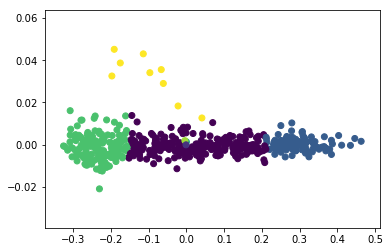

In [484]:
# PCA
spectral_pca = spectral.fit(pca_data)
plt.scatter(pca_data[:, 0], pca_data[:,1], c = spectral_pca.labels_)

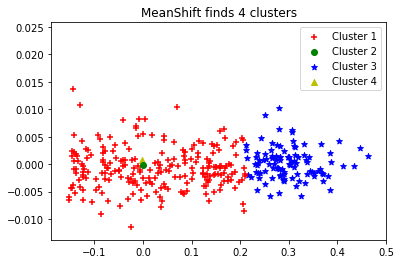

In [485]:
# PCA alt plot
# truncated svd
for i in range(0, pca_data.shape[0]):
    if spectral_pca.labels_[i] == 0:
        c1 = plt.scatter(pca_data[i,0], pca_data[i,1], c='r', marker='+')
    elif spectral_pca.labels_[i] == 1:
        c2 = plt.scatter(pca_data[i,0], pca_data[i,1], c='g', marker='o')
    elif spectral_pca.labels_[i] == 2:
        c3 = plt.scatter(pca_data[i,0], pca_data[i,1], c='b', marker='*')
    elif spectral_pca.labels_[i] == 3:
        c4 = plt.scatter(pca_data[i,0], pca_data[i,1], c='y', marker='^')

plt.legend([c1, c2, c3, c4], ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
plt.title('MeanShift finds 4 clusters')
plt.show()

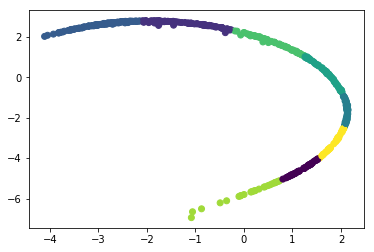

In [486]:
#MDS
spectral_mds = spectral.fit(mds_data)
plt.scatter(mds_data[:, 0], mds_data[:,1], c = spectral_mds.labels_)

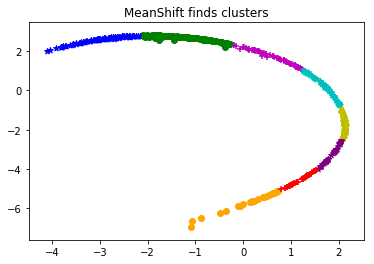

In [487]:
# MDS alt plot
# truncated svd
for i in range(0, mds_data.shape[0]):
    if spectral_mds.labels_[i] == 0:
        c1 = plt.scatter(mds_data[i,0], mds_data[i,1], c='r', marker='+')
    elif spectral_mds.labels_[i] == 1:
        c2 = plt.scatter(mds_data[i,0], mds_data[i,1], c='g', marker='o')
    elif spectral_mds.labels_[i] == 2:
        c3 = plt.scatter(mds_data[i,0], mds_data[i,1], c='b', marker='*')
    elif spectral_mds.labels_[i] == 3:
        c4 = plt.scatter(mds_data[i,0], mds_data[i,1], c='y', marker='^')
    elif spectral_mds.labels_[i] == 4:
        c5 = plt.scatter(mds_data[i,0], mds_data[i,1], c='c', marker='*')
    elif spectral_mds.labels_[i] == 5:
        c6 = plt.scatter(mds_data[i,0], mds_data[i,1], c='m', marker='+')
    elif spectral_mds.labels_[i] == 6:
        c7 = plt.scatter(mds_data[i,0], mds_data[i,1], c='orange', marker='o')
    elif spectral_mds.labels_[i] == 7:
        c8 = plt.scatter(mds_data[i,0], mds_data[i,1], c='purple', marker='*')

#plt.legend([c1, c2, c3, c4], ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
plt.title('MeanShift finds clusters')
plt.show()

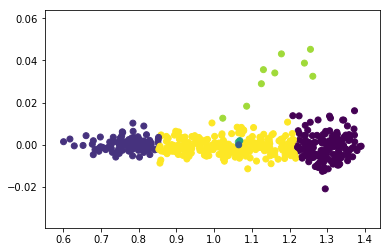

In [488]:
# tSNE
tsvd_spectral = spectral.fit(t_svd_data)
plt.scatter(t_svd_data[:, 0], t_svd_data[:,1], c = tsvd_spectral.labels_)

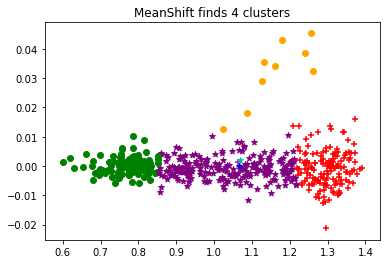

In [489]:
# tSNE alt plot
# truncated svd
for i in range(0, t_svd_data.shape[0]):
    if tsvd_spectral.labels_[i] == 0:
        c1 = plt.scatter(t_svd_data[i,0], t_svd_data[i,1], c='r', marker='+')
    elif tsvd_spectral.labels_[i] == 1:
        c2 = plt.scatter(t_svd_data[i,0], t_svd_data[i,1], c='g', marker='o')
    elif tsvd_spectral.labels_[i] == 2:
        c3 = plt.scatter(t_svd_data[i,0], t_svd_data[i,1], c='b', marker='*')
    elif tsvd_spectral.labels_[i] == 3:
        c4 = plt.scatter(t_svd_data[i,0], t_svd_data[i,1], c='y', marker='^')
    elif tsvd_spectral.labels_[i] == 4:
        c5 = plt.scatter(t_svd_data[i,0], t_svd_data[i,1], c='c', marker='*')
    elif tsvd_spectral.labels_[i] == 5:
        c6 = plt.scatter(t_svd_data[i,0], t_svd_data[i,1], c='m', marker='+')
    elif tsvd_spectral.labels_[i] == 6:
        c7 = plt.scatter(t_svd_data[i,0], t_svd_data[i,1], c='orange', marker='o')
    elif tsvd_spectral.labels_[i] == 7:
        c8 = plt.scatter(t_svd_data[i,0], t_svd_data[i,1], c='purple', marker='*')

plt.title('MeanShift finds 4 clusters')
plt.show()

## Affinity Propogation

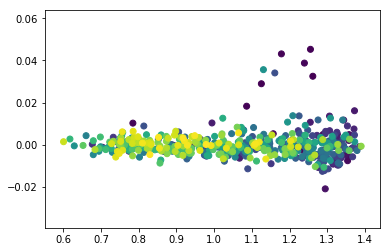

In [604]:
# t SVD
tsvd_affinity = affinity.fit(t_svd_data)
plt.scatter(t_svd_data[:, 0], t_svd_data[:,1], c = tsvd_affinity.labels_)

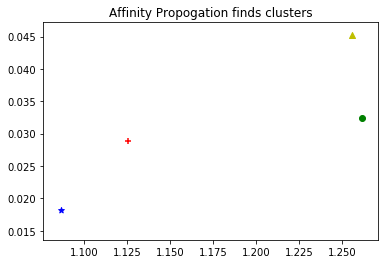

In [605]:
# tSVD
# truncated svd
for i in range(0, t_svd_data.shape[0]):
    if tsvd_affinity.labels_[i] == 0:
        c1 = plt.scatter(t_svd_data[i,0], t_svd_data[i,1], c='r', marker='+')
    elif tsvd_affinity.labels_[i] == 1:
        c2 = plt.scatter(t_svd_data[i,0], t_svd_data[i,1], c='g', marker='o')
    elif tsvd_affinity.labels_[i] == 2:
        c3 = plt.scatter(t_svd_data[i,0], t_svd_data[i,1], c='b', marker='*')
    elif tsvd_affinity.labels_[i] == 3:
        c4 = plt.scatter(t_svd_data[i,0], t_svd_data[i,1], c='y', marker='^')

plt.title('Affinity Propogation finds clusters')
plt.show()

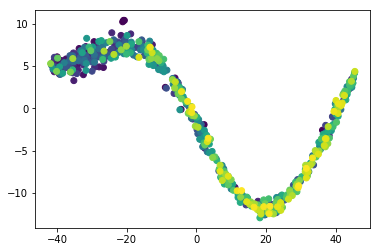

In [606]:
#tSNE
tsne_affinity = affinity.fit(tsne_data)
plt.scatter(tsne_data[:, 0], tsne_data[:,1], c = tsne_affinity.labels_)

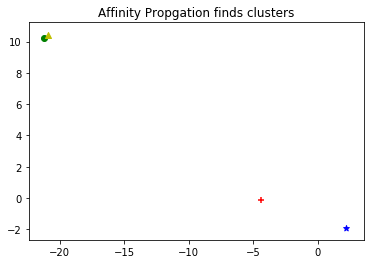

In [607]:
#tSNE
# truncated svd
for i in range(0, tsne_data.shape[0]):
    if tsne_affinity.labels_[i] == 0:
        c1 = plt.scatter(tsne_data[i,0], tsne_data[i,1], c='r', marker='+')
    elif tsne_affinity.labels_[i] == 1:
        c2 = plt.scatter(tsne_data[i,0], tsne_data[i,1], c='g', marker='o')
    elif tsne_affinity.labels_[i] == 2:
        c3 = plt.scatter(tsne_data[i,0], tsne_data[i,1], c='b', marker='*')
    elif tsne_affinity.labels_[i] == 3:
        c4 = plt.scatter(tsne_data[i,0], tsne_data[i,1], c='y', marker='^')

plt.title('Affinity Propgation finds clusters')
plt.show()

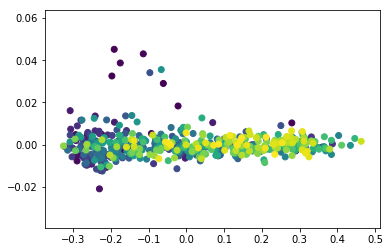

In [608]:
# PCA
affinity_pca = affinity.fit(pca_data)
plt.scatter(pca_data[:, 0], pca_data[:,1], c = affinity_pca.labels_)

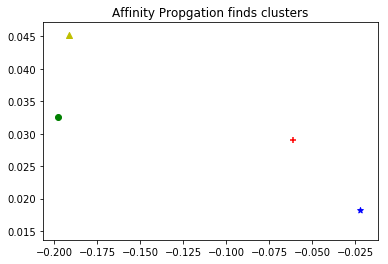

In [609]:
#PCA
# truncated svd
for i in range(0, pca_data.shape[0]):
    if affinity_pca.labels_[i] == 0:
        c1 = plt.scatter(pca_data[i,0], pca_data[i,1], c='r', marker='+')
    elif affinity_pca.labels_[i] == 1:
        c2 = plt.scatter(pca_data[i,0], pca_data[i,1], c='g', marker='o')
    elif affinity_pca.labels_[i] == 2:
        c3 = plt.scatter(pca_data[i,0], pca_data[i,1], c='b', marker='*')
    elif affinity_pca.labels_[i] == 3:
        c4 = plt.scatter(pca_data[i,0], pca_data[i,1], c='y', marker='^')

plt.title('Affinity Propgation finds clusters')
plt.show()

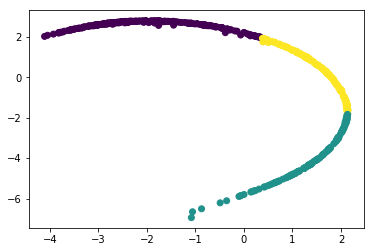

In [610]:
#MDS
affinity_mds = affinity.fit(mds_data)
plt.scatter(mds_data[:, 0], mds_data[:,1], c = tsvd_meanshift.labels_)

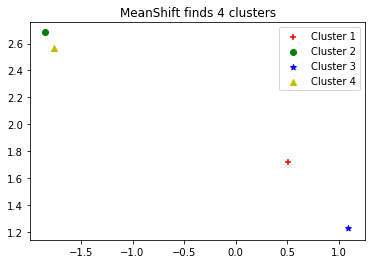

In [611]:
#MDS
# truncated svd
for i in range(0, mds_data.shape[0]):
    if affinity_mds.labels_[i] == 0:
        c1 = plt.scatter(mds_data[i,0], mds_data[i,1], c='r', marker='+')
    elif affinity_mds.labels_[i] == 1:
        c2 = plt.scatter(mds_data[i,0], mds_data[i,1], c='g', marker='o')
    elif affinity_mds.labels_[i] == 2:
        c3 = plt.scatter(mds_data[i,0], mds_data[i,1], c='b', marker='*')
    elif affinity_mds.labels_[i] == 3:
        c4 = plt.scatter(mds_data[i,0], mds_data[i,1], c='y', marker='^')

plt.legend([c1, c2, c3, c4], ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
plt.title('MeanShift finds 4 clusters')
plt.show()